# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from numpy.random import seed
import scipy.stats
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The histogram for medical charges is very skewed toward the left, or most charges are below ~12K. The mean and the standard deviation of the sample are 13270 and 12110 respectively.

Average charge is 13270.422265141257 
 Standard deviation of charges 12110.011236693994


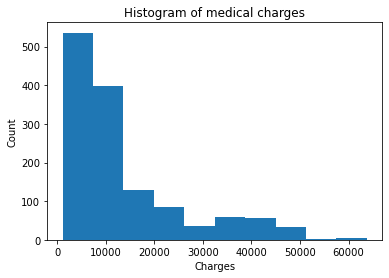

In [4]:
# plot a histogram for "charges"
plt.hist(medical.charges)
plt.title("Histogram of medical charges")
plt.xlabel("Charges")
plt.ylabel("Count")

# calculate the mean and standard deviation of "charges"
print("Average charge is",medical.charges.mean(), "\n","Standard deviation of charges", medical.charges.std())


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  The working assumption here is that this dataset is a random sample of the entire population of all hospital records. Based on this one sample with the average of 13270, we can construct a confidence interval for the range of values that should contain the true average charge charged by the hospital. We will construct a 95 percent confidence interval for the observed average charge of 13270.

In [5]:
# To construct the 95 percent CI, we first calculate margin of error. Since we do not know the population standard
# deviation, we will use the standard error

# The standard error:
sample_se=np.std(medical.charges,ddof=1)/np.sqrt(len(medical.charges))

# calculate the z-score for the two-sided 95 percent CI
z_score=norm.ppf(.975)

# margin of error:
margin_error=sample_se*z_score

# the 95 percent confidence interval 
print("95 percent CI for charges is between",medical.charges.mean()- margin_error,"and", medical.charges.mean()+ margin_error)

95 percent CI for charges is between 12621.54197822916 and 13919.302552053354


__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ 
The 95 percent confidence interval for the population mean (hospital charges) is (12621,13919) In other words, the probability that the avergage total hospital charges fell below 12000 is less than 2.5 percent.
The administrator should not be concerned that the average charge fell below 12000

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis should be that people with insurance are charged the same as people without insurance. Statistically speaking, the average charges for the insured is equal to the average charges for the uninsured.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [6]:
insured_charges=medical[medical["insuranceclaim"]==1].charges
uninsured_charges=medical[medical["insuranceclaim"]==0].charges


insured_mean=medical[medical["insuranceclaim"]==1].charges.mean()
uninsured_mean=medical[medical["insuranceclaim"]==0].charges.mean()

In [7]:
print(medical.groupby(by=['insuranceclaim']).mean())

diff_in_means=insured_mean-uninsured_mean
print("Average insured charges:", insured_mean, "Average uninsured charges:", uninsured_mean)

                      age       sex        bmi  children    smoker    region  \
insuranceclaim                                                                 
0               37.309910  0.486486  27.881586  1.681081  0.045045  1.488288   
1               40.551724  0.518519  32.635179  0.679438  0.318008  1.535121   

                     charges  
insuranceclaim                
0                8821.421892  
1               16423.928277  
Average insured charges: 16423.928276537663 Average uninsured charges: 8821.421892306294


In [8]:
medical.groupby("insuranceclaim").mean()

,age,sex,bmi,children,smoker,region,charges
insuranceclaim,,,,,,,
0,37.309910,0.486486,27.881586,1.681081,0.045045,1.488288,8821.421892
1,40.551724,0.518519,32.635179,0.679438,0.318008,1.535121,16423.928277


In [9]:
pooled_std_numerator=(len(insured_charges)-1)*insured_charges.var()+(len(insured_charges)-1)*uninsured_charges.var()
pooled_std_denominator=len(insured_charges)+len(uninsured_charges)-2
pooled_std=np.sqrt(pooled_std_numerator/pooled_std_denominator)

print(pooled_std)


11823.846097238458


In [10]:

print(pooled_std*np.sqrt(1/len(insured_charges)+1/len(uninsured_charges)))

656.0840084754836


In [11]:
# calculate t-stat
t_stat=diff_in_means/(pooled_std*np.sqrt(1/len(insured_charges)+1/len(uninsured_charges)))
print(t_stat)

11.58770262042663


In [13]:
scipy.stats.ttest_ind(insured_charges, uninsured_charges, axis=0)


Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test